### Bài thực hành số 5: Tiền xử lý dữ liệu 

In [16]:
# Câu 1: Đọc dữ liệu từ tập tin diemdh.csv vào dataframe với tên df. Tập fin diemdh.csv là điểm thi trung học phổ thông quốc gia.

import pandas as pd
df = pd.read_csv('diemdh.csv')
print(df)
# Cho biết dataframe df có bao nhiêu dòng và bao nhiêu cột
num_rows, num_columns = df.shape
print('Số dòng: ',num_rows)
print('Số cột: ',num_columns)

           sbd    yy  toan   van  khxh  khtn    ls    dl  gdcd    sh    vl  \
0      2000001  2002   6.6  6.25  6.67 -1.00  5.75  7.00  7.25 -1.00 -1.00   
1      2000002  2002   8.2  7.75  7.58 -1.00  7.00  7.25  8.50 -1.00 -1.00   
2      2000003  2001   6.8  6.75  6.92 -1.00  4.75  7.75  8.25 -1.00 -1.00   
3      2000004  2002   7.8  6.25 -1.00  6.25 -1.00 -1.00 -1.00  7.00  5.50   
4      2000005  2002   6.4  6.50 -1.00  6.17 -1.00 -1.00 -1.00  5.50  6.75   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
74439  2074714  2002   5.4  5.92 -1.00  4.67 -1.00 -1.00 -1.00  5.50  3.50   
74440  2074715  2002   8.6  7.00 -1.00  7.92 -1.00 -1.00 -1.00  6.75  8.25   
74441  2074716  2002   9.2  7.50 -1.00  8.50 -1.00 -1.00 -1.00  8.25  8.75   
74442  2074717  2002   9.0  7.00 -1.00  8.00 -1.00 -1.00 -1.00  6.75  8.00   
74443  2074718  2002   5.6  6.50 -1.00 -1.00  6.50  7.25 -1.00 -1.00 -1.00   

         hh   ta  
0     -1.00  5.2  
1     -1.00  7.0  
2     

In [8]:
# Câu 2: Dựa vào dataframe df, hãy kiểm tra dữ liệu điểm môn toán (toan), môn văn (van) và môn tiếng Anh (ta)
null_values = df[['toan', 'van', 'ta']].isnull().sum()
print(null_values)
# có dữ liệu không hợp lí không. Dữ liệu không hợp lí là giá trị Null hoặc giá trị không nằm từ 0 đến 10.

invalid_values = ((df['toan'] < 0) | (df['toan'] > 10) | df['toan'].isnull()).sum(), ((df['van'] < 0) | (df['van'] > 10) | df['van'].isnull()).sum(), ((df['ta'] < 0) | (df['ta'] > 10) | df['ta'].isnull()).sum()
print(invalid_values)

toan    0
van     0
ta      0
dtype: int64
(265, 1802, 8709)


In [25]:
# Câu 3: Tạo ra dataframe mới có tên là df_tva, df_tva bao gồm các cột số báo danh (Sbd), toán, văn, anh văn
# và chỉ bao gồm các giá trị nằm từ 0 đến 10.
# Lọc dữ liệu theo điều kiện giá trị nằm trong khoảng từ 0 đến 10
df_tva = df.loc[(df['toan'].between(0, 10)) & (df['van'].between(0, 10)) & (df['ta'].between(0, 10)), ['sbd', 'toan', 'van', 'ta']]

# Xem dataframe df_tva có bao nhiêu dòng và bao nhiêu cột
rows, columns = df_tva.shape
print(f"DataFrame df_tva có {rows} dòng và {columns} cột.")

DataFrame df_tva có 65049 dòng và 4 cột.


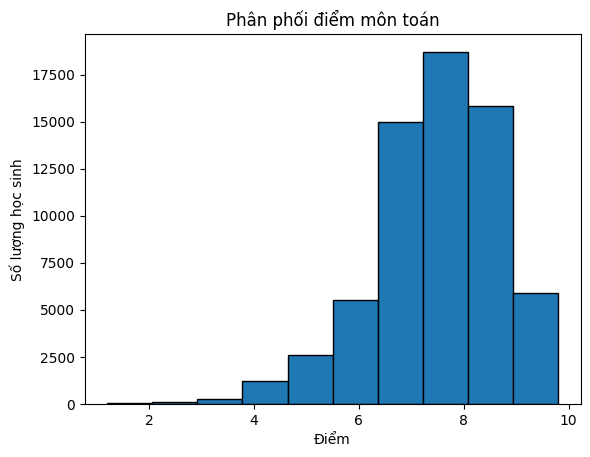

In [26]:
# Câu 4: Dựa vào dataframe df_tva, Vẽ đồ thị về phân phối của điểm môn toán
import matplotlib.pyplot as plt

# Vẽ đồ thị phân phối của điểm môn toán
plt.hist(df_tva['toan'], bins=10, edgecolor='black')
plt.title('Phân phối điểm môn toán')
plt.xlabel('Điểm')
plt.ylabel('Số lượng học sinh')
plt.show()


In [29]:
# Câu 5: Loại bỏ các outliers của điểm môn toán bằng 1 độ lệch chuẩn và lưu kết quả vào một dataframe có tên df_toan_std
import pandas as pd

# Tính độ lệch chuẩn của điểm môn toán
std_dev = df_tva['toan'].std()

# Loại bỏ outliers bằng cách chọn các giá trị nằm trong khoảng [mean - std_dev, mean + std_dev]
df_toan_std = df_tva[(df_tva['toan'] >= df_tva['toan'].mean() - std_dev) & 
                     (df_tva['toan'] <= df_tva['toan'].mean() + std_dev)]

# Xem Dataframe df_toan_std có bao nhiều và bao nhiêu cột
num_rows_toan, num_columns_toan = df_toan_std.shape
print(f"DataFrame df_toan_std có {num_rows_toan} dòng và {num_columns_toan} cột.")

DataFrame df_toan_std có 46250 dòng và 4 cột.


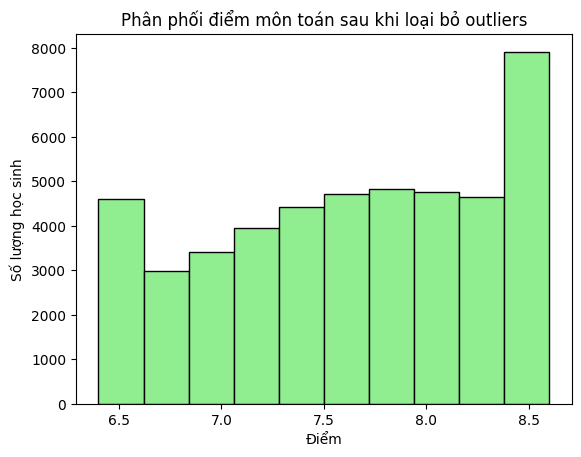

In [30]:
# Câu 6: Vẽ đồ thị về phân phối của môn toán sau khi loại bỏ các outliers bằng 1 độ lệch chuẩn
import matplotlib.pyplot as plt

# Vẽ đồ thị phân phối của điểm môn toán sau khi loại bỏ outliers
plt.hist(df_toan_std['toan'], bins=10, color='lightgreen', edgecolor='black')  # Sử dụng 10 bins
plt.title('Phân phối điểm môn toán sau khi loại bỏ outliers')
plt.xlabel('Điểm')
plt.ylabel('Số lượng học sinh')
plt.show()


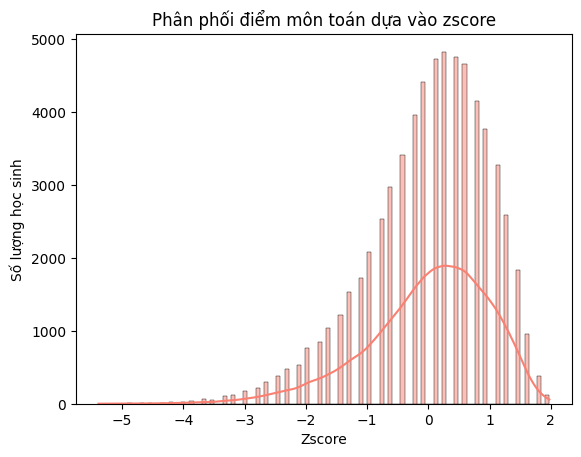

In [31]:
# Câu 7: Vẽ đồ thị phân phối điểm môn toán dựa vào zscore
import seaborn as sns

# Tính zscore cho điểm môn toán
df_tva['toan_zscore'] = (df_tva['toan'] - df_tva['toan'].mean()) / df_tva['toan'].std()

# Vẽ đồ thị phân phối của điểm môn toán dựa vào zscore
sns.histplot(df_tva['toan_zscore'], kde=True, color='salmon')
plt.title('Phân phối điểm môn toán dựa vào zscore')
plt.xlabel('Zscore')
plt.ylabel('Số lượng học sinh')
plt.show()



In [32]:
# Câu 8: Loại bỏ các outliers của điểm môn toán bằng 1 độ lệch chuẩn dựa vào zscore
# Tính zscore cho điểm môn toán
df_tva['toan_zscore'] = (df_tva['toan'] - df_tva['toan'].mean()) / df_tva['toan'].std()

# Loại bỏ outliers bằng cách chọn các giá trị nằm trong khoảng [-1, 1] zscore
df_toan_std = df_tva[(df_tva['toan_zscore'] >= -1) & (df_tva['toan_zscore'] <= 1)]


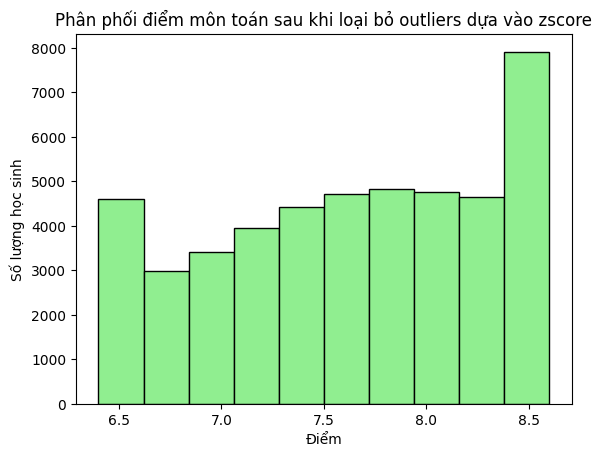

In [35]:
# Câu 9: Vẽ đồ thị về phân phối của môn toán sau khi loại bỏ các outliers bằng 1 độ lệch chuẩn dựa vào zscore
# Vẽ đồ thị phân phối của điểm môn toán sau khi loại bỏ outliers dựa vào zscore
plt.hist(df_toan_std['toan'], bins=10, color='lightgreen', edgecolor='black')  # Sử dụng 10 bins
plt.title('Phân phối điểm môn toán sau khi loại bỏ outliers dựa vào zscore')
plt.xlabel('Điểm')
plt.ylabel('Số lượng học sinh')
plt.show()

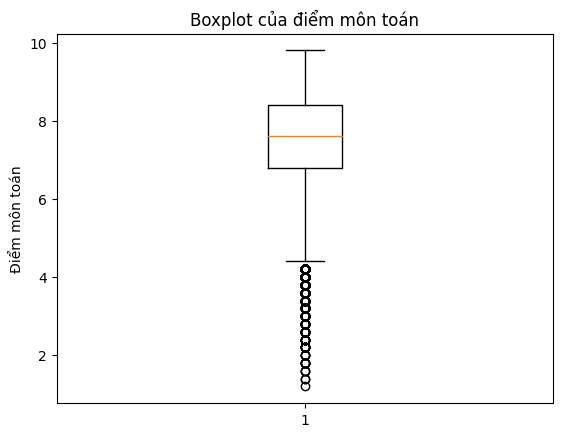

In [36]:
# Câu 10: Vẽ đồ thị boxplot để xem outliers của điểm môn toán
# Vẽ đồ thị boxplot để xem outliers của điểm môn toán
plt.boxplot(df_tva['toan'])
plt.title('Boxplot của điểm môn toán')
plt.ylabel('Điểm môn toán')
plt.show()


In [37]:
# Câu 11: Loại bỏ các outliers của điểm môn toán bằng IQR
# Tính phạm vi tương quan tương đối (IQR)
Q1 = df_tva['toan'].quantile(0.25)
Q3 = df_tva['toan'].quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ outliers bằng cách chọn các giá trị nằm trong khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df_toan_iqr = df_tva[(df_tva['toan'] >= Q1 - 1.5*IQR) & (df_tva['toan'] <= Q3 + 1.5*IQR)]


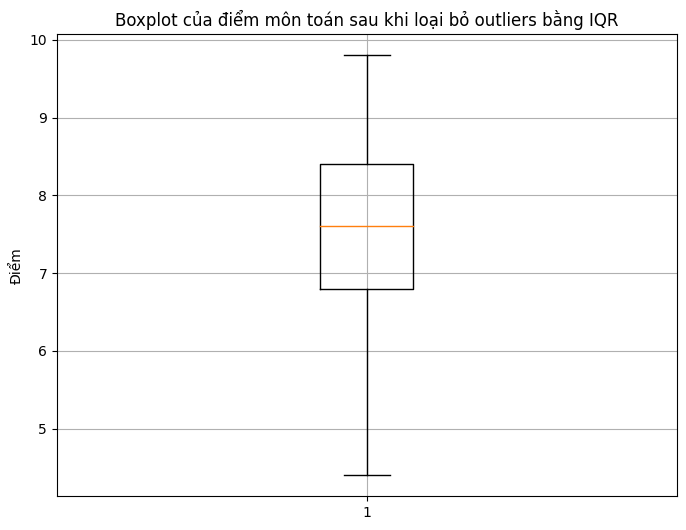

In [41]:
# Câu 12: Vẽ đồ thị boxplot của môn toán sau khi loại bỏ các outliers bằng IQR

# Vẽ boxplot để xem outliers của điểm môn toán sau khi loại bỏ bằng IQR
plt.figure(figsize=(8, 6))
plt.boxplot(df_toan_iqr['toan'])
plt.title('Boxplot của điểm môn toán sau khi loại bỏ outliers bằng IQR')
plt.ylabel('Điểm')
plt.grid(True)
plt.show()

In [42]:
# Câu 13: Dựa vào dataframe df_tva, hãy xem xét sự biến động điểm của môn toán, văn và anh văn bằng cách tính một chỉ số nào đó
# và rút ra kết luận
# Tính độ lệch chuẩn của các cột 'toan', 'van', 'ta'
std_toan = df_tva['toan'].std()
std_van = df_tva['van'].std()
std_ta = df_tva['ta'].std()

# In ra độ lệch chuẩn của các môn
print("Độ lệch chuẩn của môn toán:", std_toan)
print("Độ lệch chuẩn của môn văn:", std_van)
print("Độ lệch chuẩn của môn tiếng Anh:", std_ta)

Độ lệch chuẩn của môn toán: 1.167880618546255
Độ lệch chuẩn của môn văn: 0.8408040947275582
Độ lệch chuẩn của môn tiếng Anh: 1.7655923232248782


In [50]:
# Câu 14: Dựa vào dataframe df_tva,tiến hành rời rạc hóa điểm toán bằng cách thêm một cột xếp loại và cột xếp loại được xếp
# như sau: 8.5-10 -> Giỏi; 7-8.4 -> Khá; 5.5-6.9 -> TB; 4.0-5.4 -> TB Yếu; dưới 4-> Kém
# Hàm để xác định xếp loại dựa trên điểm
def diem_xep_loai(score):
    if score >= 8.5:
        return 'Giỏi'
    elif 7 <= score < 8.5:
        return 'Khá'
    elif 5.5 <= score < 7:
        return 'Trung bình'
    elif 4 <= score < 5.5:
        return 'Trung bình yếu'
    else:
        return 'Kém'

# Thêm cột xếp loại vào dataframe
df_tva['xep_loai'] = df_tva['toan'].apply(diem_xep_loai)

# Hiển thị 10 dòng đầu tiên của dataframe để kiểm tra
print(df_tva.head())


       sbd  toan   van   ta  toan_zscore    xep_loai  nor_toan
0  2000001   6.6  6.25  5.2    -0.764094  Trung bình  0.627907
1  2000002   8.2  7.75  7.0     0.605909         Khá  0.813953
2  2000003   6.8  6.75  6.0    -0.592843  Trung bình  0.651163
3  2000004   7.8  6.25  5.6     0.263408         Khá  0.767442
4  2000005   6.4  6.50  8.2    -0.935344  Trung bình  0.604651


In [47]:
# Câu 15: Dựa vào dataframe df_tva, thống kê xếp loại theo số lượng học sinh
# Thống kê số lượng học sinh theo xếp loại
xep_loai_counts_hs = df_tva['xep_loai'].value_counts()

# Hiển thị kết quả thống kê
print("Thống kê xếp loại theo số lượng học sinh:")
print(xep_loai_counts_hs)

Thống kê xếp loại theo số lượng học sinh:
Khá               34904
Trung bình        13087
Giỏi              12895
Trung bình yếu     3691
Kém                 472
Name: xep_loai, dtype: int64


In [46]:
# Câu 16: Dựa vào dataframe df_tva, thêm một cột mới vởi tên nor_toan và tiến hành normalization dựa vào giá trị min và max
# Tính giá trị min và max của cột 'toan'
min_score_toan = df_tva['toan'].min()
max_score_toan = df_tva['toan'].max()

# Hàm để thực hiện normalization
def normalize_score(score):
    return (score - min_score_toan) / (max_score_toan - min_score_toan)

# Thêm cột normalized vào dataframe
df_tva['nor_toan'] = df_tva['toan'].apply(normalize_score)

# Hiển thị 10 dòng đầu tiên của dataframe để kiểm tra
print(df_tva.head())

       sbd  toan   van   ta  toan_zscore    xep_loai  nor_toan
0  2000001   6.6  6.25  5.2    -0.764094  Trung bình  0.627907
1  2000002   8.2  7.75  7.0     0.605909         Khá  0.813953
2  2000003   6.8  6.75  6.0    -0.592843  Trung bình  0.651163
3  2000004   7.8  6.25  5.6     0.263408         Khá  0.767442
4  2000005   6.4  6.50  8.2    -0.935344  Trung bình  0.604651
